In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pystan
import csv
import pandas as pd
from scipy import stats
np.set_printoptions(threshold=np.nan)

In [3]:
a = pd.read_csv('shop.csv', encoding = 'latin-1')
a

,Grocery store brand,Area,Apple 1 brand,Apple 1 price,Apple 2 brand,Apple 2 price,Apple 3 brand,Apple 3 price,Banana 1 brand,Banana 1 price,...,Eggs 2 brand,Eggs 2 price,Eggs 3 brand,Eggs 3 price,Chicken 1 brand,Chicken 1 price,Chicken 2 brand,Chicken 2 price,Chicken 3 brand,Chicken 3 price
0,1,1,Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,Normal banana,1.09,...,Bodenhaltung (Free Land),2.020,Bio eggs no brand,3.300,Land Junker,6.48,NaN,0.10,NaN,0.10
1,1,1,Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,Normal banana,1.09,...,Bodenhaltung (Free Land),2.020,Bio eggs no brand,3.300,Land Junker,6.48,NaN,0.10,NaN,0.10
2,3,2,Honeycrunch,2.72,Braeburn,1.39,South African,2.99,No brand,1.09,...,Bio Eier,3.300,Eier aus Bodenhaltung,1.290,Friches,6.98,Frisches,7.48,NaN,NaN
3,4,7,Royal Gala,1.99,Pink Lady,2.99,Braeburn,1.99,Normal banana,1.09,...,Big eggs,2.380,Bio eggs,4.980,No brand,6.98,NaN,NaN,NaN,NaN
4,4,4,Kissed By Nature,1.99,Pink Lady,2.93,Edeka,1.99,Edeka,0.88,...,Luisenhof,3.380,Gut & Gunstig,1.550,Stolle,9.99,Biofino,25.99,Meine Fleischerei,9.99
5,3,6,Apfel Evelina,1.79,Apfel Tenroy/Royal Gala,1.39,Apfel rot Honeycrunch,2.74,Gut Bio Fairtrade Bio Bananen,1.65,...,Eier aus Freilandhaltung,2.030,Eier aus Bodenhaltung,1.550,Gut Bio Hahn-Brustfilet,19.99,meine MetzGerei Hahnchen Brustfilet Teilstuck,6.48,NaN,NaN
6,1,1,Bio Organic,3.13,no brand,1.00,no brand,1.40,Fairglobe,1.69,...,Eier Aus Bodenhaltung,1.550,Eier Aus Freidlandhaltung,2.030,Landjunker,6.98,NaN,NaN,NaN,NaN
7,4,1,Granny Smith,1.99,Golden Deli,1.99,Braeburn,1.99,Bio Bananen,1.99,...,Gut & Gunstig,2.030,Edeka,4.190,Le Gaulois,13.90,Friki,12.99,NaN,NaN
8,3,3,Gutbio elstar,4.38,Kissedbynature evelina,1.99,Apfel pink lady,2.79,Bio fairtrade bananen,1.69,...,Gutbio,2.800,Gutbio A,3.300,Gutbio,7.00,Maine metzgerei,6.99,Fair&gut,8.00
9,2,4,Rewe beste wahl,1.52,Pink lady,3.98,Regional,1.99,Chicquita,1.99,...,Ja,1.290,Rewe bio,3.200,No brand,6.59,No brand,6.99,Ja,4.88


In [4]:
a.keys()

Index(['Grocery store brand', 'Area', 'Apple 1 brand', 'Apple 1 price',
       'Apple 2 brand', 'Apple 2 price', 'Apple 3 brand', 'Apple 3 price',
       'Banana 1 brand', 'Banana 1 price ', 'Banana 2 brand',
       'Banana 2 price ', 'Banana 3 brand', 'Banana 3 price ',
       'Tomatoes 1 brand', 'Tomatoes 1 price ', 'Tomatoes 2 brand',
       'Tomatoes 2 price', 'Tomatoes 3 brand', 'Tomatoes 3 price ',
       'Potatos 1 brand', 'Potatos 1 price', 'Potatos 2 brand',
       'Potatos 2 price ', 'Potatos 3 brand', 'Potatos 3 price ',
       'Flour 1 brand', 'Flour 1 price ', 'Flour 2 brand', 'Flour 2 price ',
       'Flour 3 brand', 'Flour 3 price ', 'Rice 1 brand', 'Rice 1 price ',
       'Rice 2 brand', 'Rice 2 price ', 'Rice 3 brand', 'Rice 3 price ',
       'Milk 1 brand', 'Milk 1 price ', 'Milk 2 brand', 'Milk 2 price ',
       'Milk 3 brand', 'Milk 3 price ', 'Butter 1 brand', 'Butter  1 price ',
       'Butter 2 brand', 'Butter  2 price ', 'Butter  3 brand',
       'Butter 3 price

In [5]:
### base price of every product 
base_price_apple = []
base_price_banana = [] 
base_price_tomatoes =[]
base_price_potatos = []
base_price_flour = []
base_price_rice = []
base_price_milk = []
base_price_butter = []
base_price_eggs = []
base_price_chicken = []

for i in a['Apple 1 price']:
    base_price_apple.append(i)
    
for i in a['Apple 2 price']:
    base_price_apple.append(i)
    
for i in a['Apple 3 price']:
    base_price_apple.append(i)
        
    
for j in a['Banana 1 price ']:
    base_price_banana.append(j)
    
for i in a['Banana 2 price ']:
    base_price_banana.append(i)
    
for i in a['Banana 3 price ']:
    base_price_banana.append(i)   
    
    
for j in a['Tomatoes 1 price ']:
    base_price_tomatoes.append(j)
    
for i in a['Tomatoes 2 price']:
    base_price_tomatoes.append(i)
    
for i in a['Tomatoes 3 price ']:
    base_price_tomatoes.append(i) 
    
    
for j in a['Potatos 1 price']:
    base_price_potatos.append(j)
    
for i in a['Potatos 2 price ']:
    base_price_potatos.append(i)
    
for i in a['Potatos 3 price ']:
    base_price_potatos.append(i) 
      
    
for j in a['Flour 1 price ']:
    base_price_flour.append(j)
    
for i in a['Flour 2 price ']:
    base_price_flour.append(i)
    
for i in a['Flour 3 price ']:
    base_price_flour.append(i) 
    
    
for j in a['Rice 1 price ']:
    base_price_rice.append(j)
    
for i in a['Rice 2 price ']:
    base_price_rice.append(i)
    
for i in a['Rice 3 price ']:
    base_price_rice.append(i) 
    
        
for j in a['Milk 1 price ']:
    base_price_milk.append(j)
    
for i in a['Milk 2 price ']:
    base_price_milk.append(i)
    
for i in a['Milk 3 price ']:
    base_price_milk.append(i) 
      
        
for j in a['Butter  1 price ']:
    base_price_butter.append(j)
    
for i in a['Butter  2 price ']:
    base_price_butter.append(i)
    
for i in a['Butter 3 price ']:
    base_price_butter.append(i) 
    
    
for j in a['Eggs 1 price ']:
    base_price_eggs.append(j)
    
for i in a['Eggs  2 price ']:
    base_price_eggs.append(i)
    
for i in a['Eggs  3 price ']:
    base_price_eggs.append(i) 

    
for j in a['Chicken  1 price ']:
    base_price_chicken.append(j)
    
for i in a['Chicken  2 price ']:
    base_price_chicken.append(i)
    
for i in a['Chicken  3 price ']:
    base_price_chicken.append(i)     
    

#dropping the nan
cleanedBasePrice = [x for x in base_price_apple if str(x) != 'nan']
print ("Apples average price: {}".format(sum(cleanedBasePrice)/len(cleanedBasePrice)))

cleanedBasePrice2 = [x for x in base_price_banana if str(x) != 'nan']
print ("Bananas average price: {}".format(sum(cleanedBasePrice2)/len(cleanedBasePrice2)) )

cleanedBasePrice3 = [x for x in base_price_tomatoes if str(x) != 'nan']
print ("Tomatoes average price: {}".format(sum(cleanedBasePrice3)/len(cleanedBasePrice3)) ) 

cleanedBasePrice4 = [x for x in base_price_potatos if str(x) != 'nan']
print ("Potatos average price: {}".format(sum(cleanedBasePrice4)/len(cleanedBasePrice4)) ) 

cleanedBasePrice5 = [x for x in base_price_flour if str(x) != 'nan']
print ("Flour average price: {}".format(sum(cleanedBasePrice5)/len(cleanedBasePrice5)) )

cleanedBasePrice6 = [x for x in base_price_rice if str(x) != 'nan']
print ("Rice average price: {}".format(sum(cleanedBasePrice6)/len(cleanedBasePrice6)) ) 

cleanedBasePrice7 = [x for x in base_price_milk if str(x) != 'nan']
print ("Milk average price: {}".format(sum(cleanedBasePrice7)/len(cleanedBasePrice7))  )

cleanedBasePrice8 = [x for x in base_price_butter if str(x) != 'nan']
print ("Butter average price: {}".format(sum(cleanedBasePrice8)/len(cleanedBasePrice8)) )

cleanedBasePrice9 = [x for x in base_price_eggs if str(x) != 'nan']
print ("Eggs average price: {}".format(sum(cleanedBasePrice9)/len(cleanedBasePrice9)) )

cleanedBasePrice10 = [x for x in base_price_chicken if str(x) != 'nan']
print ("Chicken average price: {}".format(sum(cleanedBasePrice10)/len(cleanedBasePrice10)) )


Apples average price: 2.291625000000002
Bananas average price: 1.5189062500000006
Tomatoes average price: 3.5352317880794715
Potatos average price: 1.3463448275862062
Flour average price: 1.1683999999999994
Rice average price: 2.5488235294117634
Milk average price: 1.010379746835443
Butter average price: 4.138680981595088
Eggs average price: 2.7010062893081783
Chicken average price: 10.430094339622645


In [6]:
#Base model 

stan_code = """

data {

    int<lower=1> N; //number of prices recorded 
    int<lower=1> T; //number of types of products 10
    int<lower=1> S; //number of stores 1,2,3,4
    
    real alpha; //needed for the hyperparameters for lambda
    real beta;//needed for the hyperparameters for lambda
    
    real<lower=0> prices[N]; //observed price of each product 
    int<lower=0> store_type[N]; //type of store
    int<lower=0> product_type[N]; //product type 
    
}

// things we cannot see are the parameters

parameters {
    real <lower=0> base_price[T]; //10   
    real <lower=0> multiplier_store[S]; //4
    real <lower=0> lambda;  //hyperparameters that are not fixed and I generate
    real <lower =0> sigma2;
    
}


//likelihood function

model {
    lambda ~ gamma(alpha,beta);
    base_price ~ exponential(lambda); //justify the exponential here
    
    //all the prices that I have
    for(i in 1:N) {

        multiplier_store[store_type[i]] ~ exponential(lambda);
        prices[i] ~ normal(base_price[product_type[i]]* multiplier_store[store_type[i]], sigma2) ; 
    }
    
    }
"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e5a637c17b7b4d7c30e5f7a64040994b NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmplwh4jl9f/stanfit4anon_model_e5a637c17b7b4d7c30e5f7a64040994b_7482189953712869239.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [7]:
price = [1,2,2,1,1] #price 
types = [2,8,6,1,7] #types of products apple , 
store = [2,1,3,4,3] #lidl edeka 

stan_data = {
    'store_type': store,
    'product_type': types,
    'prices':price,
    'alpha': 0.5,
    'beta': 0.5,
    'S': len(types),
    'T':10,
    'N':len(price),

}

In [8]:
results = stan_model.sampling(data=stan_data)
print (results)

/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Inference for Stan model: anon_model_e5a637c17b7b4d7c30e5f7a64040994b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price[0]         0.72    0.09   0.84   0.01   0.15   0.45   0.93   3.21     85   1.07
base_price[1]         0.65    0.05   0.83   0.02   0.14   0.39   0.82   2.87    301   1.02
base_price[2]         0.82    0.09   1.02   0.01   0.18   0.45    1.1    3.7    138   1.05
base_price[3]         0.75    0.11   1.09   0.01   0.09   0.34    0.9   3.98     98   1.07
base_price[4]         0.87    0.17   1.14   0.01   0.15   0.43    1.1   4.05     43   1.07
base_price[5]         1.08    0.11   1.14   0.02   0.26   0.73   1.49   4.15    117   1.06
base_price[6]         0.71    0.06   0.79 7.5e-3   0.18   0.43   0.93   2.87    153   1.03
base_price[7]         0.91    0.19   1.06   0.02    0.2   0.56   1.24   3.93     31

/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [ ]:
#Actual model 

In [9]:
#Encoding for the Area and Grocery store 

store_dict = { 1: 'Lidl', 2: 'Rewe', 3: 'Aldi', 4: 'Edeka' }

area_dict = { 1:"Mitte",2:"Schoneberg",3:"Neukooln",4:"Kreuzberg",5:"Friedrichshain",
             6:"Prenzlauer Berg",7:"Tiergarten",8:"Alt-Trepof",9:"Wedding",
             10:"Gesundbrunnen",11:"Moabit",12:"Rummelsburg",13:"Lichtenberg" }

type_dict = {1:"Apple",2:"Banana",3:"Tomatoes",4:"Potatoes",5:"Flour",
             6:"Rice",7:"Milk",8:"Butter",9:"Eggs",10:"Chicken"}

In [10]:
#I eddited the data in excel and created using the encoding provided above the arrays
#So for instance at index 0 we will have the price information, type, store and area information for same item

#price of each product 
_price = [2.49, 2.49, 2.72, 1.99, 1.99, 1.79, 3.13, 1.99, 4.38, 1.52, 1.99, 1.49, 2.93, 1.99, 0.79, 1.99, 1.52, 1.49, 2.49, 2.49, 3.62, 2.99, 2.98, 2.49, 2.79, 1.99, 1.99, 1.99, 2.79, 2.99, 3.98, 0.66, 0.66, 3.65, 1.83, 1.95, 4.3, 0.66, 2.49, 1.99, 2.72, 1.99, 2.59, 1.79, 0.66, 4.14, 2.93, 2.93, 2.99, 1.99, 1.79, 1.99, 2.72, 1.79, 2.7, 2.49, 2.49, 1.39, 2.99, 2.93, 1.39, 1.0, 1.99, 1.99, 3.98, 1.99, 1.39, 1.99, 1.99, 3.65, 1.0, 2.39, 1.89, 2.49, 2.49, 1.99, 1.99, 2.74, 1.99, 1.69, 2.99, 1.99, 0.99, 2.39, 1.99, 1.99, 3.13, 2.99, 1.25, 2.99, 3.1, 1.99, 2.99, 1.89, 3.62, 1.49, 3.62, 1.49, 2.79, 1.4, 1.99, 2.39, 1.99, 2.19, 1.83, 2.79, 1.99, 2.49, 1.4, 1.4, 2.99, 1.99, 1.99, 2.74, 1.4, 1.99, 2.79, 1.99, 1.99, 1.99, 1.99, 2.99, 1.99, 1.99, 3.98, 1.89, 1.89, 1.89, 1.99, 1.99, 2.59, 1.99, 2.39, 1.89, 2.49, 4.98, 1.39, 2.49, 1.79, 2.49, 3.62, 2.49, 1.9, 2.79, 3.62, 2.49, 1.99, 2.49, 1.99, 2.74, 0.79, 3.13, 1.99,  1.95, 2.93, 2.59, 1.99, 2.39, 1.93, 1.89, 1.09, 1.09, 1.09, 1.09, 0.88, 1.65, 1.69, 1.99, 1.69, 1.99, 1.79, 1.99, 1.99, 1.99, 1.09, 1.99, 1.49, 1.09, 1.09, 1.09, 1.99, 1.99, 1.65, 1.09, 1.69, 1.59, 1.99, 1.69, 1.69, 0.99, 1.69, 1.09, 1.99, 1.69, 1.49, 1.65, 1.75, 1.99, 1.69, 1.09, 1.69, 1.09, 0.99, 0.99, 1.09, 1.19, 1.09, 1.09, 1.09, 1.99, 1.65, 1.79, 1.69, 1.99, 0.99, 1.69, 1.69, 1.89, 1.69, 1.99,  0.99, 0.88, 1.09, 1.49,1.79, 0.88, 1.99, 1.69, 1.99, 1.09, 1.69, 1.69, 1.69, 1.09, 1.09, 0.99, 1.99, 1.69, 1.69, 1.99, 1.79, 1.09, 1.69, 1.49 , 4.0, 1.09, 1.79, 1.69, 1.79, 1.09, 0.99, 1.99, 0.99, 1.99, 1.65, 1.65, 1.69, 1.69, 1.99, 1.99, 1.69, 1.09, 0.99, 1.49, 1.09, 1.15, 1.69, 0.1, 0.1,  4.0,  1.0, 1.0,  1.09,  1.09,  0.88, 1.99, 1.79,  1.99, 1.99,  1.09,  1.09,  1.09,  1.99, 0.89,  1.99, 1.99,  1.69, 1.09,  2.19, 2.19, 3.52, 2.49, 5.98, 4.38, 2.19, 4.48, 3.98, 2.49, 1.99, 2.49, 5.58, 4.98, 3.98, 2.29, 4.98, 1.49, 3.98, 1.49, 4.48, 2.19, 4.38, 1.99, 3.98, 2.79, 4.98, 2.19, 1.19, 1.79, 18.1, 1.49, 6.0, 3.98, 5.58, 2.85, 3.95, 4.58, 3.68, 8.0, 4.38, 2.99, 1.59, 1.59, 3.98, 2.99, 1.99, 1.99, 1.59, 1.99, 2.49, 6.54, 3.98, 2.25, 1.79, 4.58, 4.58, 2.19, 4.98, 5.58, 6.3, 2.19, 2.99, 3.52, 2.49, 2.49, 1.29, 7.69, 3.58, 2.39, 2.99, 2.99, 1.99, 7.11, 3.98, 5.98, 7.9, 3.83, 2.99, 3.68, 3.99, 5.96, 2.99, 1.99, 2.29, 2.19, 3.68, 4.0, 1.99, 2.29, 4.05, 3.55, 1.99, 2.19, 4.98, 1.59, 5.98, 5.3, 5.3, 2.39, 2.29, 1.99, 3.39, 1.59, 2.19, 1.99, 4.29, 3.98, 5.58, 5.58, 3.23, 5.98, 3.83, 4.58, 2.49, 2.19, 2.39, 0.89, 2.29, 5.98, 1.99, 1.59, 2.39, 2.19, 1.49, 7.11, 2.99, 2.19, 4.38, 1.59, 2.29, 1.99, 1.69, 2.79, 4.29, 7.97, 1.99, 1.99, 2.39, 2.29, 4.58, 5.98, 3.68,  2.4, 2.4, 3.38, 2.79,  5.18, 2.49, 6.54, 3.68, 0.68, 0.68, 0.95, 0.6, 0.92, 1.2, 0.68, 0.44, 1.39, 1.69, 2.29, 2.49, 1.99, 0.92, 0.95, 1.99, 1.69, 0.73, 1.45, 1.45, 1.0, 0.64, 1.49, 0.92, 1.45,  0.64, 0.85, 1.89, 1.69, 0.5, 1.45, 1.2, 0.73, 0.72, 1.45, 1.39, 1.99, 0.68, 1.99, 1.1, 1.99, 1.49, 1.49, 0.65, 0.92, 1.99, 1.99, 1.69, 0.56, 1.79, 2.49, 1.1, 1.53, 1.19, 1.19, 1.19, 0.62, 0.92, 0.56, 0.72, 0.73, 1.99, 0.64, 1.53, 2.29, 1.99, 0.44, 0.92, 0.62, 0.92, 3.06, 0.68, 1.49, 3.98, 1.99, 1.99, 1.2, 1.2, 1.85,  1.0, 0.88, 1.59, 1.45, 0.88, 1.69, 1.19, 0.68, 2.29, 1.55, 1.45, 1.0, 0.72, 1.2, 1.39, 1.99, 0.72, 0.72, 0.73, 0.92, 1.19, 1.19, 1.59, 1.19, 1.79, 0.88, 1.59, 0.92, 0.73, 1.49, 1.49, 1.19, 0.72, 1.19, 3.06, 1.0, 0.72, 1.79, 1.69, 1.19, 0.92, 1.45, 0.92, 0.72, 1.19, 7.11, 1.0, 1.0, 0.72, 2.35,  2.99, 1.39, 1.79, 1.49, 1.79, 1.99,  1.33, 0.64, 1.2, 1.2, 1.26, 1.33,  0.92, 1.53, 0.5, 1.32, 0.35, 0.35, 0.35, 0.35, 0.35, 1.48, 0.35, 0.35, 0.99, 0.69, 1.59, 0.35, 1.59, 0.35, 1.69, 0.89, 1.75, 0.35, 1.45, 0.35, 1.69, 0.35, 0.99,  1.99, 0.35, 1.75, 1.75, 0.35, 0.35, 1.39, 0.95, 1.38, 1.75, 0.8, 2.49, 0.95, 0.99, 0.35, 0.99, 0.3, 0.3, 0.35, 2.19, 0.35, 0.35, 1.75, 0.35, 0.39, 2.29, 0.39, 1.99, 0.35, 0.95, 0.95,  0.99, 0.99, 0.45, 1.49, 1.75, 1.15, 1.59, 1.59, 1.59, 0.99, 1.75, 0.99, 0.99, 1.39, 0.95, 1.89,  0.99,  1.29,  0.35, 0.89, 0.95, 0.95, 0.35, 0.35, 0.35, 0.35, 1.8, 1.8, 3.58, 1.99, 0.95, 2.29, 1.38, 0.99, 0.95, 0.99, 8.73, 1.8, 0.69, 0.95, 1.59, 1.59,  0.99, 0.69,  0.89, 1.25, 1.69, 1.99, 0.69, 1.69, 1.59, 1.38, 0.95,  1.49, 0.35, 1.69, 1.38, 0.35, 1.39, 1.69, 1.39, 0.99, 0.89, 0.99, 0.99, 1.69, 1.69, 1.69, 1.59, 0.95, 0.79, 1.99, 1.99, 0.89, 0.98, 2.89, 1.89, 0.89, 4.39, 0.89, 1.99, 3.29, 1.98, 1.89, 4.58, 1.89, 3.98, 0.89, 0.89, 1.99, 1.99, 3.98, 4.39, 0.98, 3.98,  7.2, 3.98, 1.29, 0.49, 1.99, 0.89, 0.89, 4.39, 1.89, 3.89, 2.1, 0.89, 1.99, 1.55, 1.78, 1.99, 5.58, 0.89, 0.89, 1.79, 10.0, 4.98, 4.98, 0.89, 3.98, 1.89, 3.98, 1.89, 1.99, 0.89, 1.89, 1.89, 0.98, 1.89, 1.89, 1.99, 1.99,  0.49, 1.99, 2.89, 1.9, 2.89, 1.99, 1.99, 0.98, 1.98, 0.98, 4.58, 2.58, 7.2, 0.98, 1.89, 0.89, 0.89, 3.98, 1.89, 5.98, 0.98, 2.89, 1.5, 1.5, 1.98, 0.98, 3.18, 1.89, 7.98,  1.99, 1.89, 4.99, 4.99,  1.89, 1.99, 5.38, 1.99, 4.99,  0.98, 0.98, 1.89, 4.78, 4.39, 0.98, 1.89,  1.99, 1.19, 2.99, 3.18, 1.78, 5.98, 0.89, 3.18, 3.98, 0.98, 3.18, 7.2, 2.78, 1.89, 1.89, 1.98, 1.99, 3.89, 1.5, 1.99, 5.98, 1.99, 1.98, 4.39,  0.98,  1.99, 0.89, 1.99, 0.89, 3.49, 0.89, 0.89, 0.69, 1.09, 1.49, 0.61, 0.69, 1.49, 0.95, 0.61, 1.05, 0.75, 0.88, 0.78, 0.95, 0.69, 0.69, 0.69, 0.78, 0.69, 1.29, 0.95, 0.69, 0.69, 1.09, 0.69, 1.29, 0.99, 0.69, 0.69, 0.69, 1.25, 1.29, 1.25, 0.61, 0.89, 0.95, 0.69, 0.69, 1.39, 1.05, 0.69, 0.7, 0.7, 1.05, 1.15, 1.29, 1.39, 1.05, 0.69, 0.95, 1.09, 0.7, 1.25, 1.09, 1.05, 1.05, 0.61, 1.39, 1.39, 0.99, 1.25, 1.39, 0.99, 1.15, 1.39, 1.15, 0.69, 0.88, 0.69, 1.29, 1.25, 1.25, 1.15, 1.25, 0.61, 1.05,  0.69, 1.15, 1.39, 1.19, 0.61, 1.25, 1.15, 0.89, 1.39, 0.69, 1.29, 1.15, 0.61, 1.05, 1.15, 0.69, 0.69, 1.39, 0.99, 0.99, 0.69, 0.89, 0.69, 0.69, 0.7, 1.09, 0.96, 1.15, 1.05, 1.09, 0.7, 1.25, 1.25, 0.95, 1.19, 0.69, 0.95, 1.05, 0.61, 1.25, 1.25, 1.05, 1.39, 1.19, 1.05, 1.39, 1.15, 0.89, 1.25, 1.15, 1.05, 1.29,  0.99, 0.79, 1.29, 0.69, 0.99, 1.29, 1.15, 1.15, 1.09, 1.05, 1.09, 0.95, 0.69, 1.29, 1.25, 1.25, 0.99, 1.39,  0.89, 1.59, 1.25, 1.25, 0.96, 1.29, 0.99, 0.89, 0.96, 0.69, 1.25, 3.98, 3.98, 3.98, 3.58, 3.58, 3.98, 4.38, 3.98, 4.38, 0.75, 3.98, 2.98, 2.58, 4.78, 4.78, 6.58, 3.6, 4.45, 4.8, 2.58, 0.35, 4.78, 3.6, 4.6, 3.8, 2.39, 5.18, 0.98, 6.76, 4.38, 4.98, 4.38, 4.78, 4.78, 3.58, 4.39, 4.38, 3.58, 3.98, 3.6, 4.78, 3.18, 4.0, 4.0, 3.8, 3.6, 3.58, 3.58, 3.78, 4.78, 4.78, 6.58, 4.58, 3.58, 3.98, 4.78, 4.78, 3.58, 4.7, 3.98, 3.58, 3.98, 4.78, 3.4, 1.59, 4.38, 2.78, 4.78, 3.98, 4.78, 4.78, 4.8, 3.68, 2.58, 3.98, 4.78, 4.58, 8.0, 4.6, 2.25, 4.78, 2.58, 6.76, 4.78, 2.59, 3.38, 0.78, 4.78, 5.0, 4.25, 3.4, 1.98, 4.78, 4.8, 3.9, 3.58, 3.4, 4.4, 3.95, 3.9, 4.78, 4.78, 3.38, 3.58, 3.98, 5.98, 3.98, 4.98, 4.58, 4.38, 4.38, 3.365, 3.38, 5.98, 4.78, 4.78, 4.78, 3.8, 1.69, 4.38, 4.38, 3.98, 3.58, 3.58, 3.98, 4.4, 3.78, 4.8, 3.78, 4.38, 4.78, 9.6, 1.69, 2.09, 5.98, 3.58, 6.76, 4.3, 4.38, 3.78, 4.78, 3.98, 3.58, 4.09, 3.8, 5.98, 4.38, 4.8, 4.38, 4.38, 4.8, 4.8, 4.58, 3.6, 4.78, 4.78, 4.38, 4.38, 3.38, 4.78, 3.38, 3.58, 4.78, 1.55, 1.55, 1.9, 1.29, 6.98, 3.3, 1.98, 2.99, 1.29, 2.34, 2.49, 2.35, 5.98, 2.75, 3.3, 2.03, 2.82, 1.548, 3.3, 3.3, 4.79, 2.39, 1.9, 2.6, 1.98, 3.27, 3.99, 4.9, 1.39, 1.59, 3.98, 2.75, 3.99, 3.35, 2.35, 3.27, 1.28, 2.98, 1.55, 5.58, 3.3, 1.55, 1.56, 1.56, 3.3, 2.78, 2.99, 2.99, 1.55, 2.79, 3.96, 1.55, 3.3, 2.35, 2.75, 2.02, 2.02, 3.3, 2.38, 3.38, 2.03, 1.55, 2.03, 2.8, 1.29, 1.29, 4.9, 2.99, 1.55, 1.9, 2.99, 4.9, 2.028, 2.0, 2.0, 1.55, 5.98, 2.04, 1.56, 1.548, 3.38, 2.19, 1.29, 1.29, 1.98, 4.9, 1.55, 1.29, 2.03, 3.38, 2.8, 1.55, 2.03, 4.98, 1.55, 4.79, 2.04, 2.04, 1.55, 2.98, 4.79, 4.79, 2.03, 4.98, 2.28, 4.9, 2.03, 1.548, 1.69, 3.3, 3.3, 1.29, 4.98, 1.55, 1.55, 2.03, 4.19, 3.3, 3.2, 3.49, 1.29, 1.55, 4.79,  6.58, 1.55, 2.75, 1.6, 1.6, 4.98, 6.58, 1.56, 2.75, 2.028, 2.82, 6.98, 3.24, 1.69, 1.69, 3.18, 2.03, 2.29, 1.55, 2.82, 3.3,2.18, 2.38, 2.38, 2.63, 3.36, 3.36, 2.03, 2.23, 1.55, 1.55, 2.03, 1.91, 1.79, 1.56,  1.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29]

#type of each product: apples, banana, egg ... 
_types = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]

#type of the store: edeka, aldi ...
_store = [1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,1,4,3,2,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,3,2,2,4,4,2,1,4,4,1,2,2,2,2,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,4,4,3,1,4,3,2,4,2,4,4,3,2,1,1,1,4,4,3,1,2,4,3,1,2,1,4,1,2,3,1,4,3,3,3,1,2,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,4,4,3,1,4,3,1,2,1,4,4,3,3,3,1,2,4,2,2,1,1,1,3,4,4,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,4,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,4,2,3,1,1,4,1,2,2,3,4,4,1,2,4,4,3,4,2,3,2,1,1,1,4,4,3,2,4,2,4,4,4,2,1,1,4,4,2,3,1,4,1,2,3,4,4,4,4,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,3,2,4,2,4,4,3,4,2,1,4,4,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,1,2,4,4,4,3,2,3,2,1,1,3,4,4,3,1,3,2,4,2,4,4,3,4,2,1,4,2,4,3,1,2,1,2,2,3,4,1,4,4,1,4,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,1,4,3,4,3,3,1,2,4,4,4,3,2,3,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1]

#area of Berlin: Kreutzber, Schoneberg ...
_area = [1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,1,3,3,4,4,3,1,1,5,5,7,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,1,1,3,4,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,4,3,4,8,1,4,3,4,11,5,4,6,1,5,1,1,7,13,4,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,3,7,13,4,2,1,3,1,1,7,4,6,1,1,3,4,3,8,5,1,10,3,4,8,9,11,5,5,4,1,1,12,4,1,6,5,4,1,3,4,4,3,1,5,5,7,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,4,6,1,1,3,4,3,8,5,1,10,4,3,4,9,11,5,5,4,1,12,4,1,6,5,3,3,1,5,5,7,7,4,1,3,1,1,2,7,4,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,7,4,1,1,3,4,3,8,5,1,10,4,3,4,8,9,5,5,1,6,12,4,6,5,4,5,1,3,3,4,5,7,5,6,3,7,4,2,1,3,1,1,7,4,3,4,3,8,5,1,4,3,4,9,5,1,6,12,4,5,4,5,3,3,4,5,6,7,4,2,1,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,3,4,3,8,5,1,10,4,3,4,11,5,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,5,7,5,6,7,13,4,2,1,1,1,2,7,4,6,1,3,4,3,8,5,1,10,4,3,4,5,1,1,12,4,1,6,5,1,3,3,4,4,1,5,5,6,4,2,1,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,1,3,4,4,3,1,1,5,5,7,5,6,7,13,4,2,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3,1,1,2,7,4,6,1,1,3,4,3,8,5,1,10,4,3,4,8,9,11,5,5,5,4,1,1,6,12,4,1,6,5,4,5,1,3,3,4,4,3,1,1,5,5,7,5,6,3,7,13,4,2,1,3]

#branded and not branded products, if brand then == 1, else == 0
_brand = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [32]:
#Base model 

stan_code = """

data {

    int<lower=1> N; //number of prices recorded 
    int<lower=1> T; //number of types of products 10
    int<lower=1> S; //number of stores 1,2,3,4
    
    real alpha; //needed for the hyperparameters for lambda
    real beta;//needed for the hyperparameters for lambda
    
    real<lower=0> prices[N]; //observed price of each product 
    int<lower=0> store_type[N]; //type of store
    int<lower=0> product_type[N]; //product type 
    
}

// things we cannot see are the parameters

parameters {
    real <lower=0> base_price[T]; //10   
    real <lower=0> multiplier_store[S]; //4
    real <lower=0> lambda;  //hyperparameters that are not fixed and I generate
    real <lower =0> sigma2;
    
}


//likelihood function
//justifying the priors 

model {
    lambda ~ gamma(alpha,beta);
    
    
    //all the prices that I have
    for(i in 1:N) {
        base_price[product_type[i]] ~ exponential(lambda); //justify the exponential here
        multiplier_store[store_type[i]] ~ exponential(lambda);
        prices[i] ~ normal(base_price[product_type[i]]* multiplier_store[store_type[i]], sigma2) ; 
    }
    
    }
"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e242fbede2564313ddce5d4a6b6a1033 NOW.
/Users/ewa_anna_szyszka/anaconda/envs/py36/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/wq/333f_hfn6d998n4_jwddvpqc0000gn/T/tmpy8ap0mc9/stanfit4anon_model_e242fbede2564313ddce5d4a6b6a1033_8701276121707188782.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [36]:
#price of each product 
price = [2.49, 2.49, 2.72, 1.99, 1.99, 1.79, 3.13, 1.99, 4.38, 1.52, 1.99, 1.49, 2.93, 1.99, 0.79, 1.99, 1.52, 1.49, 2.49, 2.49, 3.62, 2.99, 2.98, 2.49, 2.79, 1.99, 1.99, 1.99, 2.79, 2.99, 3.98, 0.66, 0.66, 3.65, 1.83, 1.95, 4.3, 0.66, 2.49, 1.99, 2.72, 1.99, 2.59, 1.79, 0.66, 4.14, 2.93, 2.93, 2.99, 1.99, 1.79, 1.99, 2.72, 1.79, 2.7, 2.49, 2.49, 1.39, 2.99, 2.93, 1.39, 1.0, 1.99, 1.99, 3.98, 1.99, 1.39, 1.99, 1.99, 3.65, 1.0, 2.39, 1.89, 2.49, 2.49, 1.99, 1.99, 2.74, 1.99, 1.69, 2.99, 1.99, 0.99, 2.39, 1.99, 1.99, 3.13, 2.99, 1.25, 2.99, 3.1, 1.99, 2.99, 1.89, 3.62, 1.49, 3.62, 1.49, 2.79, 1.4, 1.99, 2.39, 1.99, 2.19, 1.83, 2.79, 1.99, 2.49, 1.4, 1.4, 2.99, 1.99, 1.99, 2.74, 1.4, 1.99, 2.79, 1.99, 1.99, 1.99, 1.99, 2.99, 1.99, 1.99, 3.98, 1.89, 1.89, 1.89, 1.99, 1.99, 2.59, 1.99, 2.39, 1.89, 2.49, 4.98, 1.39, 2.49, 1.79, 2.49, 3.62, 2.49, 1.9, 2.79, 3.62, 2.49, 1.99, 2.49, 1.99, 2.74, 0.79, 3.13, 1.99,  1.95, 2.93, 2.59, 1.99, 2.39, 1.93, 1.89, 1.09, 1.09, 1.09, 1.09, 0.88, 1.65, 1.69, 1.99, 1.69, 1.99, 1.79, 1.99, 1.99, 1.99, 1.09, 1.99, 1.49, 1.09, 1.09, 1.09, 1.99, 1.99, 1.65, 1.09, 1.69, 1.59, 1.99, 1.69, 1.69, 0.99, 1.69, 1.09, 1.99, 1.69, 1.49, 1.65, 1.75, 1.99, 1.69, 1.09, 1.69, 1.09, 0.99, 0.99, 1.09, 1.19, 1.09, 1.09, 1.09, 1.99, 1.65, 1.79, 1.69, 1.99, 0.99, 1.69, 1.69, 1.89, 1.69, 1.99,  0.99, 0.88, 1.09, 1.49,1.79, 0.88, 1.99, 1.69, 1.99, 1.09, 1.69, 1.69, 1.69, 1.09, 1.09, 0.99, 1.99, 1.69, 1.69, 1.99, 1.79, 1.09, 1.69, 1.49 , 4.0, 1.09, 1.79, 1.69, 1.79, 1.09, 0.99, 1.99, 0.99, 1.99, 1.65, 1.65, 1.69, 1.69, 1.99, 1.99, 1.69, 1.09, 0.99, 1.49, 1.09, 1.15, 1.69, 0.1, 0.1,  4.0,  1.0, 1.0,  1.09,  1.09,  0.88, 1.99, 1.79,  1.99, 1.99,  1.09,  1.09,  1.09,  1.99, 0.89,  1.99, 1.99,  1.69, 1.09,  2.19, 2.19, 3.52, 2.49, 5.98, 4.38, 2.19, 4.48, 3.98, 2.49, 1.99, 2.49, 5.58, 4.98, 3.98, 2.29, 4.98, 1.49, 3.98, 1.49, 4.48, 2.19, 4.38, 1.99, 3.98, 2.79, 4.98, 2.19, 1.19, 1.79, 18.1, 1.49, 6.0, 3.98, 5.58, 2.85, 3.95, 4.58, 3.68, 8.0, 4.38, 2.99, 1.59, 1.59, 3.98, 2.99, 1.99, 1.99, 1.59, 1.99, 2.49, 6.54, 3.98, 2.25, 1.79, 4.58, 4.58, 2.19, 4.98, 5.58, 6.3, 2.19, 2.99, 3.52, 2.49, 2.49, 1.29, 7.69, 3.58, 2.39, 2.99, 2.99, 1.99, 7.11, 3.98, 5.98, 7.9, 3.83, 2.99, 3.68, 3.99, 5.96, 2.99, 1.99, 2.29, 2.19, 3.68, 4.0, 1.99, 2.29, 4.05, 3.55, 1.99, 2.19, 4.98, 1.59, 5.98, 5.3, 5.3, 2.39, 2.29, 1.99, 3.39, 1.59, 2.19, 1.99, 4.29, 3.98, 5.58, 5.58, 3.23, 5.98, 3.83, 4.58, 2.49, 2.19, 2.39, 0.89, 2.29, 5.98, 1.99, 1.59, 2.39, 2.19, 1.49, 7.11, 2.99, 2.19, 4.38, 1.59, 2.29, 1.99, 1.69, 2.79, 4.29, 7.97, 1.99, 1.99, 2.39, 2.29, 4.58, 5.98, 3.68,  2.4, 2.4, 3.38, 2.79,  5.18, 2.49, 6.54, 3.68, 0.68, 0.68, 0.95, 0.6, 0.92, 1.2, 0.68, 0.44, 1.39, 1.69, 2.29, 2.49, 1.99, 0.92, 0.95, 1.99, 1.69, 0.73, 1.45, 1.45, 1.0, 0.64, 1.49, 0.92, 1.45,  0.64, 0.85, 1.89, 1.69, 0.5, 1.45, 1.2, 0.73, 0.72, 1.45, 1.39, 1.99, 0.68, 1.99, 1.1, 1.99, 1.49, 1.49, 0.65, 0.92, 1.99, 1.99, 1.69, 0.56, 1.79, 2.49, 1.1, 1.53, 1.19, 1.19, 1.19, 0.62, 0.92, 0.56, 0.72, 0.73, 1.99, 0.64, 1.53, 2.29, 1.99, 0.44, 0.92, 0.62, 0.92, 3.06, 0.68, 1.49, 3.98, 1.99, 1.99, 1.2, 1.2, 1.85,  1.0, 0.88, 1.59, 1.45, 0.88, 1.69, 1.19, 0.68, 2.29, 1.55, 1.45, 1.0, 0.72, 1.2, 1.39, 1.99, 0.72, 0.72, 0.73, 0.92, 1.19, 1.19, 1.59, 1.19, 1.79, 0.88, 1.59, 0.92, 0.73, 1.49, 1.49, 1.19, 0.72, 1.19, 3.06, 1.0, 0.72, 1.79, 1.69, 1.19, 0.92, 1.45, 0.92, 0.72, 1.19, 7.11, 1.0, 1.0, 0.72, 2.35,  2.99, 1.39, 1.79, 1.49, 1.79, 1.99,  1.33, 0.64, 1.2, 1.2, 1.26, 1.33,  0.92, 1.53, 0.5, 1.32, 0.35, 0.35, 0.35, 0.35, 0.35, 1.48, 0.35, 0.35, 0.99, 0.69, 1.59, 0.35, 1.59, 0.35, 1.69, 0.89, 1.75, 0.35, 1.45, 0.35, 1.69, 0.35, 0.99,  1.99, 0.35, 1.75, 1.75, 0.35, 0.35, 1.39, 0.95, 1.38, 1.75, 0.8, 2.49, 0.95, 0.99, 0.35, 0.99, 0.3, 0.3, 0.35, 2.19, 0.35, 0.35, 1.75, 0.35, 0.39, 2.29, 0.39, 1.99, 0.35, 0.95, 0.95,  0.99, 0.99, 0.45, 1.49, 1.75, 1.15, 1.59, 1.59, 1.59, 0.99, 1.75, 0.99, 0.99, 1.39, 0.95, 1.89,  0.99,  1.29,  0.35, 0.89, 0.95, 0.95, 0.35, 0.35, 0.35, 0.35, 1.8, 1.8, 3.58, 1.99, 0.95, 2.29, 1.38, 0.99, 0.95, 0.99, 8.73, 1.8, 0.69, 0.95, 1.59, 1.59,  0.99, 0.69,  0.89, 1.25, 1.69, 1.99, 0.69, 1.69, 1.59, 1.38, 0.95,  1.49, 0.35, 1.69, 1.38, 0.35, 1.39, 1.69, 1.39, 0.99, 0.89, 0.99, 0.99, 1.69, 1.69, 1.69, 1.59, 0.95, 0.79, 1.99, 1.99, 0.89, 0.98, 2.89, 1.89, 0.89, 4.39, 0.89, 1.99, 3.29, 1.98, 1.89, 4.58, 1.89, 3.98, 0.89, 0.89, 1.99, 1.99, 3.98, 4.39, 0.98, 3.98,  7.2, 3.98, 1.29, 0.49, 1.99, 0.89, 0.89, 4.39, 1.89, 3.89, 2.1, 0.89, 1.99, 1.55, 1.78, 1.99, 5.58, 0.89, 0.89, 1.79, 10.0, 4.98, 4.98, 0.89, 3.98, 1.89, 3.98, 1.89, 1.99, 0.89, 1.89, 1.89, 0.98, 1.89, 1.89, 1.99, 1.99,  0.49, 1.99, 2.89, 1.9, 2.89, 1.99, 1.99, 0.98, 1.98, 0.98, 4.58, 2.58, 7.2, 0.98, 1.89, 0.89, 0.89, 3.98, 1.89, 5.98, 0.98, 2.89, 1.5, 1.5, 1.98, 0.98, 3.18, 1.89, 7.98,  1.99, 1.89, 4.99, 4.99,  1.89, 1.99, 5.38, 1.99, 4.99,  0.98, 0.98, 1.89, 4.78, 4.39, 0.98, 1.89,  1.99, 1.19, 2.99, 3.18, 1.78, 5.98, 0.89, 3.18, 3.98, 0.98, 3.18, 7.2, 2.78, 1.89, 1.89, 1.98, 1.99, 3.89, 1.5, 1.99, 5.98, 1.99, 1.98, 4.39,  0.98,  1.99, 0.89, 1.99, 0.89, 3.49, 0.89, 0.89, 0.69, 1.09, 1.49, 0.61, 0.69, 1.49, 0.95, 0.61, 1.05, 0.75, 0.88, 0.78, 0.95, 0.69, 0.69, 0.69, 0.78, 0.69, 1.29, 0.95, 0.69, 0.69, 1.09, 0.69, 1.29, 0.99, 0.69, 0.69, 0.69, 1.25, 1.29, 1.25, 0.61, 0.89, 0.95, 0.69, 0.69, 1.39, 1.05, 0.69, 0.7, 0.7, 1.05, 1.15, 1.29, 1.39, 1.05, 0.69, 0.95, 1.09, 0.7, 1.25, 1.09, 1.05, 1.05, 0.61, 1.39, 1.39, 0.99, 1.25, 1.39, 0.99, 1.15, 1.39, 1.15, 0.69, 0.88, 0.69, 1.29, 1.25, 1.25, 1.15, 1.25, 0.61, 1.05,  0.69, 1.15, 1.39, 1.19, 0.61, 1.25, 1.15, 0.89, 1.39, 0.69, 1.29, 1.15, 0.61, 1.05, 1.15, 0.69, 0.69, 1.39, 0.99, 0.99, 0.69, 0.89, 0.69, 0.69, 0.7, 1.09, 0.96, 1.15, 1.05, 1.09, 0.7, 1.25, 1.25, 0.95, 1.19, 0.69, 0.95, 1.05, 0.61, 1.25, 1.25, 1.05, 1.39, 1.19, 1.05, 1.39, 1.15, 0.89, 1.25, 1.15, 1.05, 1.29,  0.99, 0.79, 1.29, 0.69, 0.99, 1.29, 1.15, 1.15, 1.09, 1.05, 1.09, 0.95, 0.69, 1.29, 1.25, 1.25, 0.99, 1.39,  0.89, 1.59, 1.25, 1.25, 0.96, 1.29, 0.99, 0.89, 0.96, 0.69, 1.25, 3.98, 3.98, 3.98, 3.58, 3.58, 3.98, 4.38, 3.98, 4.38, 0.75, 3.98, 2.98, 2.58, 4.78, 4.78, 6.58, 3.6, 4.45, 4.8, 2.58, 0.35, 4.78, 3.6, 4.6, 3.8, 2.39, 5.18, 0.98, 6.76, 4.38, 4.98, 4.38, 4.78, 4.78, 3.58, 4.39, 4.38, 3.58, 3.98, 3.6, 4.78, 3.18, 4.0, 4.0, 3.8, 3.6, 3.58, 3.58, 3.78, 4.78, 4.78, 6.58, 4.58, 3.58, 3.98, 4.78, 4.78, 3.58, 4.7, 3.98, 3.58, 3.98, 4.78, 3.4, 1.59, 4.38, 2.78, 4.78, 3.98, 4.78, 4.78, 4.8, 3.68, 2.58, 3.98, 4.78, 4.58, 8.0, 4.6, 2.25, 4.78, 2.58, 6.76, 4.78, 2.59, 3.38, 0.78, 4.78, 5.0, 4.25, 3.4, 1.98, 4.78, 4.8, 3.9, 3.58, 3.4, 4.4, 3.95, 3.9, 4.78, 4.78, 3.38, 3.58, 3.98, 5.98, 3.98, 4.98, 4.58, 4.38, 4.38, 3.365, 3.38, 5.98, 4.78, 4.78, 4.78, 3.8, 1.69, 4.38, 4.38, 3.98, 3.58, 3.58, 3.98, 4.4, 3.78, 4.8, 3.78, 4.38, 4.78, 9.6, 1.69, 2.09, 5.98, 3.58, 6.76, 4.3, 4.38, 3.78, 4.78, 3.98, 3.58, 4.09, 3.8, 5.98, 4.38, 4.8, 4.38, 4.38, 4.8, 4.8, 4.58, 3.6, 4.78, 4.78, 4.38, 4.38, 3.38, 4.78, 3.38, 3.58, 4.78, 1.55, 1.55, 1.9, 1.29, 6.98, 3.3, 1.98, 2.99, 1.29, 2.34, 2.49, 2.35, 5.98, 2.75, 3.3, 2.03, 2.82, 1.548, 3.3, 3.3, 4.79, 2.39, 1.9, 2.6, 1.98, 3.27, 3.99, 4.9, 1.39, 1.59, 3.98, 2.75, 3.99, 3.35, 2.35, 3.27, 1.28, 2.98, 1.55, 5.58, 3.3, 1.55, 1.56, 1.56, 3.3, 2.78, 2.99, 2.99, 1.55, 2.79, 3.96, 1.55, 3.3, 2.35, 2.75, 2.02, 2.02, 3.3, 2.38, 3.38, 2.03, 1.55, 2.03, 2.8, 1.29, 1.29, 4.9, 2.99, 1.55, 1.9, 2.99, 4.9, 2.028, 2.0, 2.0, 1.55, 5.98, 2.04, 1.56, 1.548, 3.38, 2.19, 1.29, 1.29, 1.98, 4.9, 1.55, 1.29, 2.03, 3.38, 2.8, 1.55, 2.03, 4.98, 1.55, 4.79, 2.04, 2.04, 1.55, 2.98, 4.79, 4.79, 2.03, 4.98, 2.28, 4.9, 2.03, 1.548, 1.69, 3.3, 3.3, 1.29, 4.98, 1.55, 1.55, 2.03, 4.19, 3.3, 3.2, 3.49, 1.29, 1.55, 4.79,  6.58, 1.55, 2.75, 1.6, 1.6, 4.98, 6.58, 1.56, 2.75, 2.028, 2.82, 6.98, 3.24, 1.69, 1.69, 3.18, 2.03, 2.29, 1.55, 2.82, 3.3,2.18, 2.38, 2.38, 2.63, 3.36, 3.36, 2.03, 2.23, 1.55, 1.55, 2.03, 1.91, 1.79, 1.56,  1.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29, 6.48, 6.48, 6.98, 6.98, 9.99, 19.99, 6.98, 13.9, 7.0, 6.59, 7.4, 6.88, 12.99, 25.99, 6.48, 6.48, 9.98, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.48, 6.98, 13.98, 11.9, 6.99, 6.29, 6.29, 29.9, 6.48, 8.74, 6.48, 10.26, 8.67, 7.0, 9.99, 6.48, 15.99, 6.48, 8.09, 20.0, 20.0, 6.48, 9.99, 12.99, 12.99, 6.48, 6.98, 6.29, 9.98, 6.29, 9.98, 5.29]

#type of each product: apples, banana, egg ... 
types = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]

#type of the store: edeka, aldi ...
store = [1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,1,4,3,2,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,3,2,2,4,4,2,1,4,4,1,2,2,2,2,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,3,4,3,2,3,2,1,1,1,4,4,3,1,4,3,2,4,2,4,4,3,2,1,1,1,4,4,3,1,2,4,3,1,2,1,4,1,2,3,1,4,3,3,3,1,2,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,4,4,3,1,4,3,1,2,1,4,4,3,3,3,1,2,4,2,2,1,1,1,3,4,4,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,4,4,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,4,2,3,1,1,4,1,2,2,3,4,4,1,2,4,4,3,4,2,3,2,1,1,1,4,4,3,2,4,2,4,4,4,2,1,1,4,4,2,3,1,4,1,2,3,4,4,4,4,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,3,2,4,2,4,4,3,4,2,1,4,4,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,1,2,4,4,4,3,2,3,2,1,1,3,4,4,3,1,3,2,4,2,4,4,3,4,2,1,4,2,4,3,1,2,1,2,2,3,4,1,4,4,1,4,4,2,3,2,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,3,1,4,3,4,3,3,1,2,4,4,4,3,2,3,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1,1,1,3,4,4,3,1,4,3,2,4,2,4,4,3,4,2,1,1,1,4,4,3,4,1,2,4,2,3,1,2,1,4,1,2,2,3,4,1,4,3,4,3,3,1,2,4,4,3,4,3,2,3,2,1]


stan_data = {
    'store_type': store,
    'product_type': types,
    'prices':price,
    'alpha': 7,
    'beta': 1,
    'S': 4,
    'T':10,
    'N':len(price),
}

In [37]:
results = stan_model.sampling(data=stan_data)
print (results)

Inference for Stan model: anon_model_e242fbede2564313ddce5d4a6b6a1033.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price[0]       2.1e-6  3.3e-8 2.1e-6 8.1e-8 6.4e-7 1.5e-6 3.0e-6 7.5e-6   4000    nan
base_price[1]       2.6e-6  4.0e-8 2.5e-6 6.8e-8 7.3e-7 1.8e-6 3.6e-6 9.3e-6   4000    nan
base_price[2]       2.2e-6  3.4e-8 2.1e-6 5.3e-8 6.3e-7 1.5e-6 3.1e-6 7.7e-6   4000    nan
base_price[3]       2.3e-6  3.8e-8 2.4e-6 7.1e-8 6.5e-7 1.6e-6 3.2e-6 9.1e-6   4000    nan
base_price[4]       2.7e-6  4.3e-8 2.7e-6 6.8e-8 7.6e-7 1.8e-6 3.7e-610.0e-6   4000    nan
base_price[5]       2.5e-6  4.1e-8 2.6e-6 5.2e-8 6.7e-7 1.6e-6 3.4e-6 9.5e-6   4000    nan
base_price[6]       2.1e-6  3.3e-8 2.1e-6 5.4e-8 6.4e-7 1.5e-6 2.9e-6 7.8e-6   4000    nan
base_price[7]       2.1e-6  3.4e-8 2.1e-6 4.0e-8 5.2e-7 1.4e-6 2.9e-6 7.8e-6   4000

Posterior 95% interval over λ: [2862.25296324 3080.71725941]


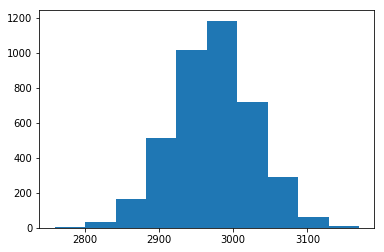

In [38]:
samples = results.extract()
plt.hist(samples['lambda'])
print('Posterior 95% interval over λ:', np.percentile(samples['lambda'], [2.5, 97.5]))